In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [95]:
df = pd.read_csv("data/all/meteo/sampled_df_8900.csv")

In [96]:
df = df.head(8900).copy()

In [97]:
df.drop(['date', 'geometry', 'TIPOBOSQUE', 'UsoIFN', 'n_CLAMFE', 'UsoMFE'], axis=1, inplace=True)
df

,altitud,pendiente,orientacion,is_fire,n_CLAIFN,t_max,u,v,specific_humidity,relative_humidity
0,226.43176,1.512323,287.237460,False,200,302.235107,-0.482693,-1.057308,0.011643,51.497208
1,591.98520,37.829388,174.613740,True,141,291.587646,5.145885,-2.061542,0.002844,29.498014
2,302.96150,57.214653,76.929750,True,111,306.062988,0.700964,0.509414,0.006809,24.005035
3,365.60150,36.542430,112.896065,False,141,298.082031,-2.383409,-1.082997,0.013121,67.682327
4,216.34225,48.399876,129.588600,True,140,305.471191,4.591745,-0.290295,0.004589,14.796286
...,...,...,...,...,...,...,...,...,...,...
8895,280.95074,1.616301,172.754210,False,300,291.010498,0.162024,0.233051,0.007427,59.040955
8896,903.64624,32.051823,25.583755,True,111,311.276611,2.509975,0.582116,0.004170,11.024256
8897,247.48325,1.070765,163.662060,False,200,285.116943,1.105661,-0.115092,0.003814,51.251907
8898,613.74450,16.115680,3.861130,True,141,313.853271,1.348340,0.422118,0.004195,8.289402


Sin binarizar la variable categórica

In [98]:
X = df.drop(['is_fire', 'n_CLAIFN'], axis=1)
y = df['is_fire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [99]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Variable': X_train.columns,
    'Importancia': model.coef_[0]
})

importances = importances.sort_values(by='Importancia', ascending=False)

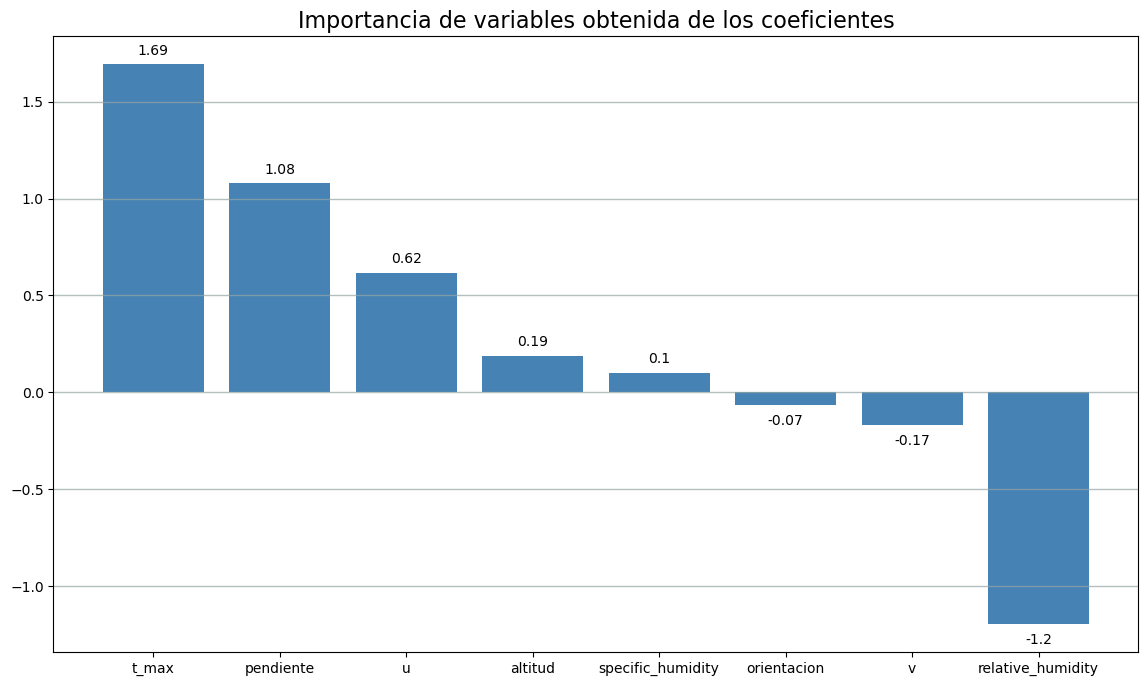

In [100]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importancia'], color='steelblue')
plt.title('Importancia de variables obtenida de los coeficientes', size=16)
plt.xticks(rotation='horizontal')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importancia'])):
    if v>0:
        y = v+.05 
    else:
        y = v-.10
    plt.text( i , y , str(round(v,2)), color='black', horizontalalignment='center')
plt.show()

In [101]:
importances["Importancia"] = importances["Importancia"].abs()
importances = importances.sort_values(by='Importancia', ascending=False)

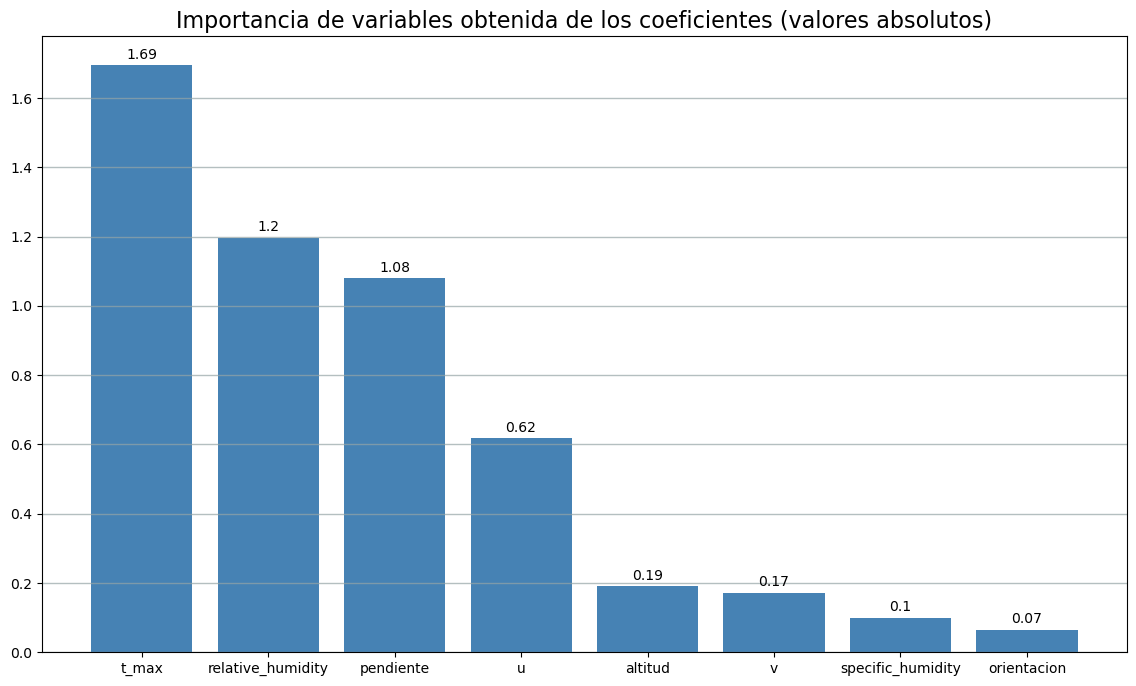

In [102]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importancia'], color='steelblue')
plt.title('Importancia de variables obtenida de los coeficientes (valores absolutos)', size=16)
plt.xticks(rotation='horizontal')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importancia'])):
    plt.text( i , v+.02 , str(round(v,2)), color='black', horizontalalignment='center')
plt.show()

Con binarización de la variable categórica

In [103]:
classes = {111: 'Monte arbolado. Bosque', 112: 'Monte arbolado. Bosque de plantaciones', 114: 'Monte arbolado', 121: 'Monte con arbolado ralo. Bosque', 122: 'Monte con arbolado ralo. Bosque de plantaciones', 124: 'Monte con arbolado ralo', 132: 'Monte arbolado temporalmente sin cobertura', 140: 'Monte desarbolado', 141: 'Monte desarbolado. Matorral', 142: 'Monte desarbolado. Herbazal o pastizal', 150: 'Monte sin vegetación superior', 161: 'Monte arbolado', 171: 'Monte desarbolado con arbolado disperso', 172: 'Monte con arbolado disperso de plantación', 200: "Agrícola", 300: 'Artificial', 400: 'Humedal', 500: 'Agua'}
df["n_CLAIFN"] = df["n_CLAIFN"].map(classes)
X = df.drop(['is_fire', 'n_CLAIFN'], axis=1)
X = X.join(pd.get_dummies(df["n_CLAIFN"].astype("category")))
y = df['is_fire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [104]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Variable': X_train.columns,
    'Importancia': model.coef_[0]
})

importances = importances.sort_values(by='Importancia', ascending=False)

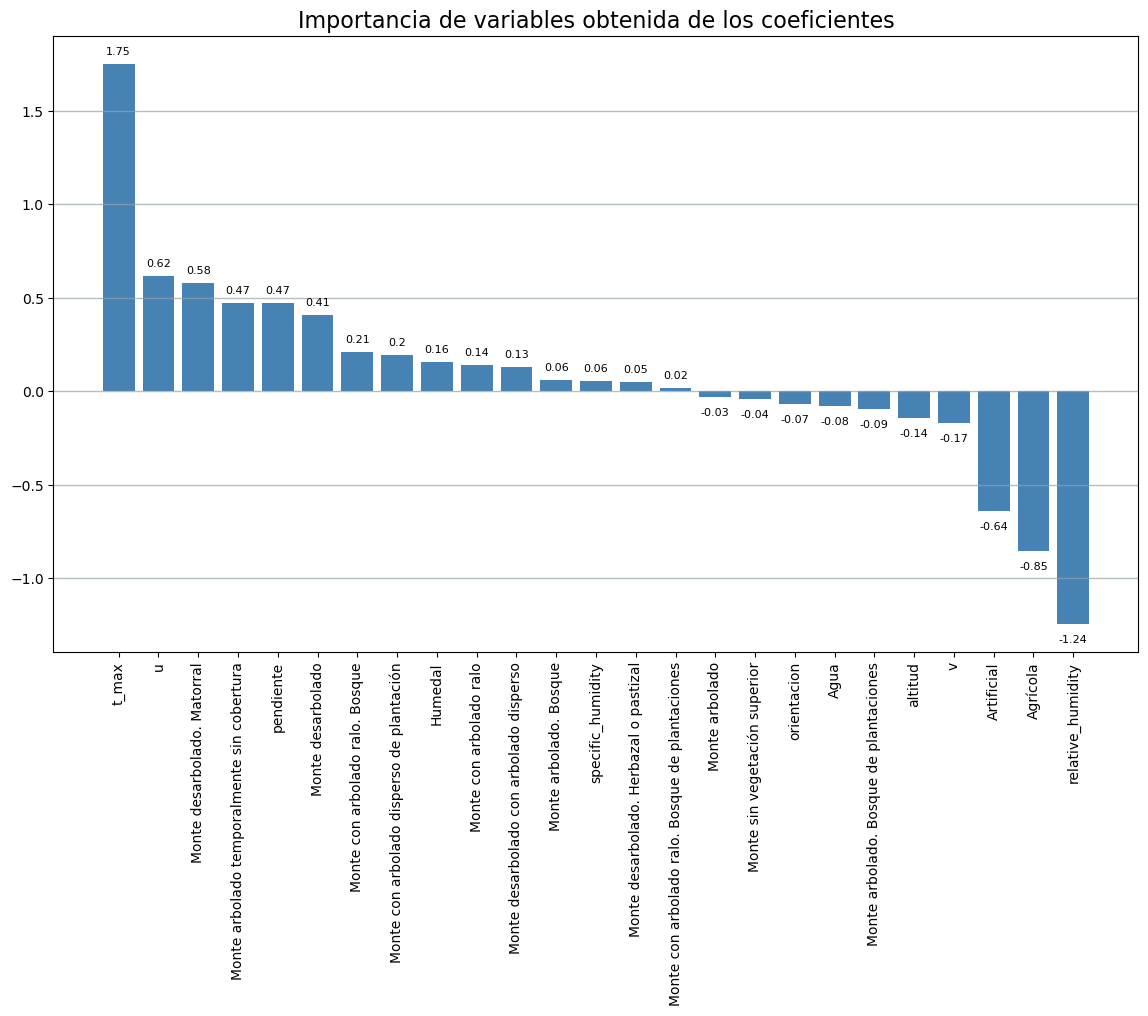

In [105]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importancia'], color='steelblue')
plt.title('Importancia de variables obtenida de los coeficientes', size=16)
plt.xticks(rotation='vertical')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importancia'])):
    if v>0:
        y = v+.05 
    else:
        y = v-.10
    plt.text( i , y , str(round(v,2)), color='black', horizontalalignment='center', size=8)
plt.show()

In [106]:
importances["Importancia"] = importances["Importancia"].abs()
importances = importances.sort_values(by='Importancia', ascending=False)

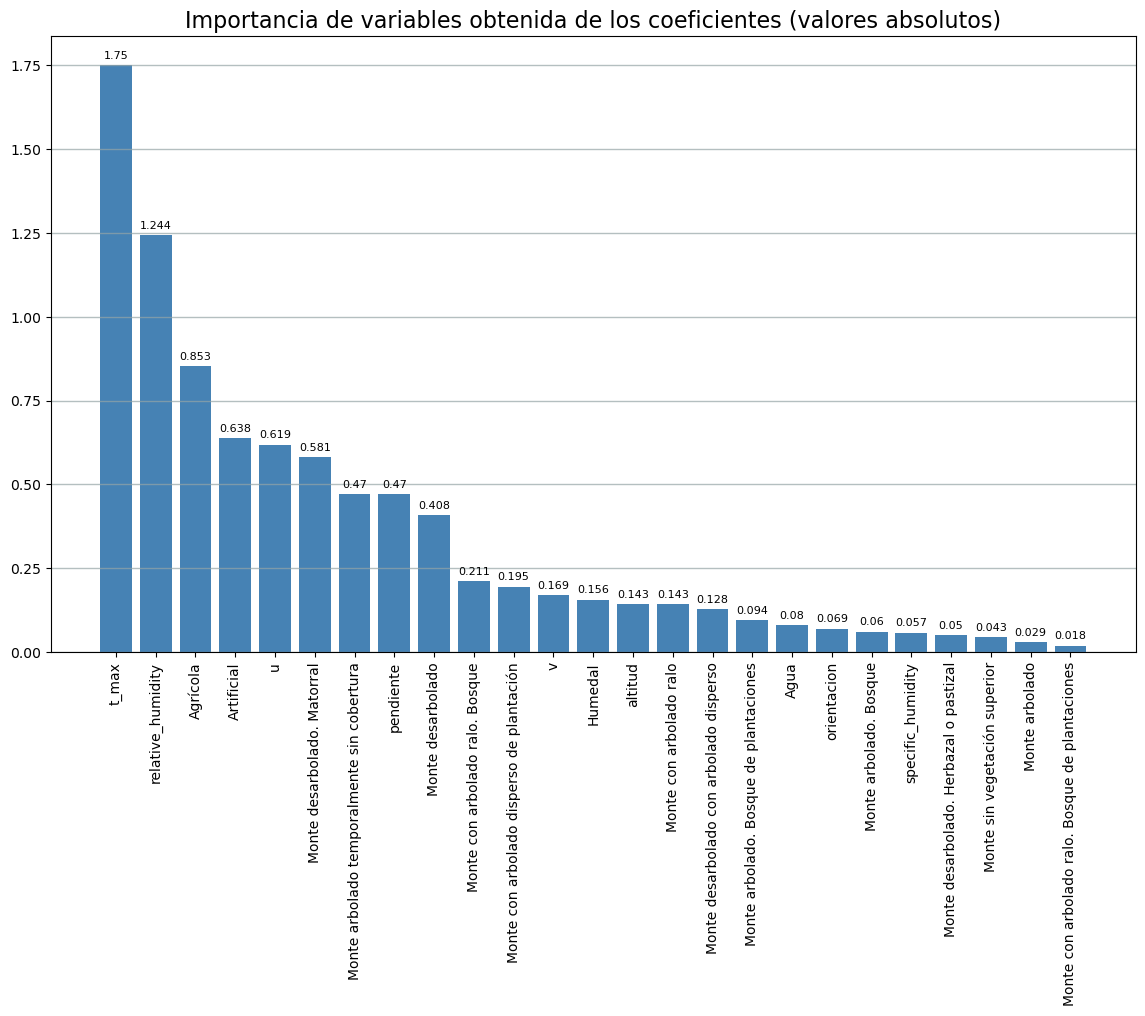

In [107]:
plt.bar(figure=plt.figure(figsize=(14, 8)), x=importances['Variable'], height=importances['Importancia'], color='steelblue')
plt.title('Importancia de variables obtenida de los coeficientes (valores absolutos)', size=16)
plt.xticks(rotation='vertical')
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
for i, v in enumerate(list(importances['Importancia'])):
    plt.text( i , v+.02 , str(round(v,3)), color='black', horizontalalignment='center', size=8)
plt.show()